In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_excel("/work/weather_data_historical.xlsx")
df["date"]=df["date"].dt.date
df = df.set_index("date")

df2 = pd.read_excel("/work/weather_data.xlsx")
df2["date"]=df2["date"].dt.date
df2 = df2.set_index("date")
df2.rename(columns={"temp":"temperature"}, inplace=True)

df = pd.concat([df, df2])
df

,temperature
date,
2012-01-01,9.9
2012-01-02,7.0
2012-01-03,6.8
2012-01-04,7.1
2012-01-05,7.0
...,...
2024-01-11,3.4
2024-01-12,3.6
2024-01-13,3.2


In [ ]:
df["Rolling Average (30 Days)"] = df.rolling(30).mean()
df["Rolling Average (365 Days)"] = df["temperature"].rolling(365).mean()

annual_avg = df["Rolling Average (365 Days)"][pd.to_datetime(df.index).month==12]
annual_avg = annual_avg[pd.to_datetime(annual_avg.index).day==31]

annual_avg

date
2012-12-31     9.757534
2013-12-31     9.640000
2014-12-31    10.983288
2015-12-31    10.340274
2016-12-31    10.372055
2017-12-31    10.612877
2018-12-31    10.712877
2019-12-31    10.369315
2020-12-31    10.798356
2021-12-31    10.316986
2022-12-31    11.148767
2023-12-31    11.101096
Name: Rolling Average (365 Days), dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(np.arange(len(annual_avg)).reshape(-1,1), annual_avg)

pred_2024 = lr.predict(np.array(len(annual_avg)+1).reshape(-1,1))
forecast_df = pd.DataFrame({"date":"12-31-2024", "temperature":pred_2024})
forecast_df["date"] = pd.to_datetime(forecast_df["date"])
forecast_df

,date,temperature
0,2024-12-31,11.196601


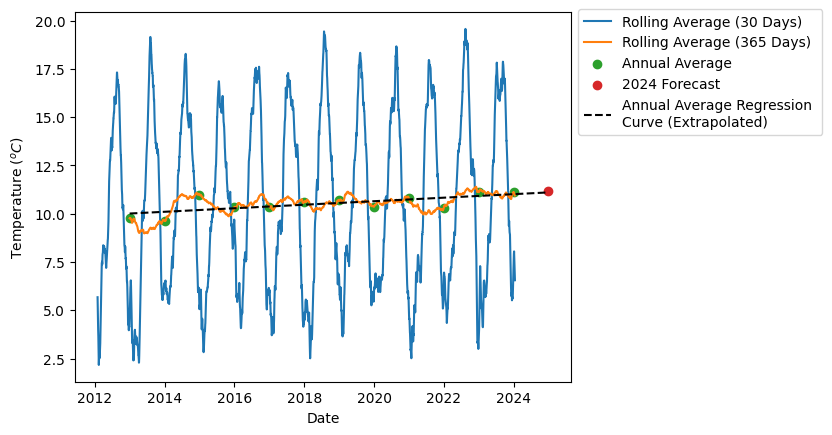

In [ ]:
df[["Rolling Average (30 Days)","Rolling Average (365 Days)"]].plot(
    xlabel="Date",
    ylabel="Temperature ($^oC$)"
);
ax =plt.gca()
ax.scatter(annual_avg.index, annual_avg, color="C2", label="Annual Average")
ax.scatter(forecast_df["date"], forecast_df["temperature"], color="C3", label="2024 Forecast")
ax.plot(
    annual_avg.index.join(forecast_df["date"], how="outer"), lr.predict(np.arange(len(annual_avg)+1).reshape(-1,1)),
    color="black",
    linestyle="--",
    label="Annual Average Regression \nCurve (Extrapolated)"
)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.65));

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81ea5747-df50-4b7a-89ee-a86b13f40626' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>